In [1]:
import gc
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from catboost import CatBoostRegressor
import pickle
%matplotlib inline

In [2]:
df = pd.read_csv("./Data/EDA_of_used_cars.csv")
df

,manufacturer,model,year,price,mileage,location,transmission,fuel_type,grade,car_condition,car_age
0,Toyota,Tacoma,2005,3930000,248415,Asaba,automatic,Petrol,D,Nigerian used,16
1,Toyota,Camry,2003,1242000,180990,Lagos,automatic,Petrol,D,Nigerian used,18
2,Mercedes-Benz,C250,2012,5610000,234826,Kaduna,automatic,Petrol,C,Nigerian used,9
3,Toyota,Tundra,2007,5066800,172632,Lagos,automatic,Petrol,D,Nigerian used,14
4,Honda,Jazz,2008,1130000,155077,Lagos,manual,Petrol,D,Nigerian used,13
...,...,...,...,...,...,...,...,...,...,...,...
3141,Landrover,Range Rover Sport,2008,3460000,46683,PortHarcourt,automatic,Petrol,D,Nigerian used,13
3142,Ford,Edge,2010,2770000,86999,Abuja,automatic,Petrol,C,Foreign used,11
3143,Honda,Accord Crosstour,2010,2885000,122048,Abuja,automatic,Petrol,D,Nigerian used,11
3144,Mercedes-Benz,Cls500,2006,1390000,49844,PortHarcourt,automatic,Petrol,D,Nigerian used,15


#### Check for Multicolinearity

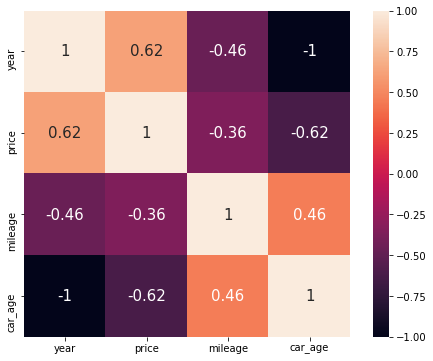

In [3]:
plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, square=True, annot_kws={'fontsize':15})
plt.show()

Multicolinearity occurs between the car_age and year column. Therefore I will make use of year column during model training

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3146 entries, 0 to 3145
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   manufacturer   3146 non-null   object
 1   model          3146 non-null   object
 2   year           3146 non-null   int64 
 3   price          3146 non-null   int64 
 4   mileage        3146 non-null   int64 
 5   location       3146 non-null   object
 6   transmission   3146 non-null   object
 7   fuel_type      3146 non-null   object
 8   grade          3146 non-null   object
 9   car_condition  3146 non-null   object
 10  car_age        3146 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 270.5+ KB


In [5]:
# converting all categorical columns to lower case
df.manufacturer = df.manufacturer.str.lower()
df.model = df.model.str.lower()
df.car_condition = df.car_condition.str.lower()
df.grade = df.grade.str.lower()
df.fuel_type = df.fuel_type.str.lower()
df.transmission = df.transmission.str.lower()
df.location = df.location.str.lower()

### Encoding the Categorical Features

In [6]:
# Manufacturer
le_manufac = LabelEncoder()
le_manufac.fit(df['manufacturer'])
# save the encoder
pickle.dump(le_manufac, open('./Encoders/manufacturer_encoder.pk1','wb'))
# transform the manufacturer encoder
df['manufacturer'] = le_manufac.transform(df['manufacturer'])

In [7]:
#location
le_locat = LabelEncoder()
le_locat.fit(df['location'])
# save the encoder
pickle.dump(le_locat, open('./Encoders/location_encoder.pk1','wb'))
# transform the location encoder
df['location'] = le_locat.transform(df['location'])

In [8]:
#model
le_model = LabelEncoder()
le_model.fit(df['model'])
# save the encoder
pickle.dump(le_model, open('./Encoders/model_encoder.pk1','wb'))
# transform the model encoder
df['model'] = le_model.transform(df['model'])

In [9]:
#transmission
le_trans = LabelEncoder()
le_trans.fit(df['transmission'])
# save the encoder
pickle.dump(le_trans, open('./Encoders/transmission_encoder.pk1','wb'))
# transform the transmission encoder
df['transmission'] = le_trans.transform(df['transmission'])

In [10]:
# fuel_type
le_ft = LabelEncoder()
le_ft.fit(df['fuel_type'])
# save the encoder
pickle.dump(le_ft, open('./Encoders/fuel_type_encoder.pk1','wb'))
# transform the fuel_type encoder
df['fuel_type'] = le_ft.transform(df['fuel_type'])

In [11]:
# grade
le_grd = LabelEncoder()
le_grd.fit(df['grade'])
# save the encoder
pickle.dump(le_grd, open('./Encoders/grade_encoder.pk1','wb'))
# transform the grade encoder
df['grade'] = le_grd.transform(df['grade'])

In [12]:
# car_condition
le_ccd = LabelEncoder()
le_ccd.fit(df['car_condition'])
# save the encoder
pickle.dump(le_ccd, open('./Encoders/car_condition_encoder.pk1','wb'))
# transform the car_condition encoder
df['car_condition'] = le_ccd.transform(df['car_condition'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3146 entries, 0 to 3145
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   manufacturer   3146 non-null   int32
 1   model          3146 non-null   int32
 2   year           3146 non-null   int64
 3   price          3146 non-null   int64
 4   mileage        3146 non-null   int64
 5   location       3146 non-null   int32
 6   transmission   3146 non-null   int32
 7   fuel_type      3146 non-null   int32
 8   grade          3146 non-null   int32
 9   car_condition  3146 non-null   int32
 10  car_age        3146 non-null   int64
dtypes: int32(7), int64(4)
memory usage: 184.5 KB


In [14]:
df

,manufacturer,model,year,price,mileage,location,transmission,fuel_type,grade,car_condition,car_age
0,47,322,2005,3930000,248415,2,0,3,3,1,16
1,47,74,2003,1242000,180990,7,0,3,3,1,18
2,30,66,2012,5610000,234826,6,0,3,2,1,9
3,47,343,2007,5066800,172632,7,0,3,3,1,14
4,16,196,2008,1130000,155077,7,1,3,3,1,13
...,...,...,...,...,...,...,...,...,...,...,...
3141,25,270,2008,3460000,46683,10,0,3,3,1,13
3142,11,124,2010,2770000,86999,0,0,3,2,0,11
3143,16,36,2010,2885000,122048,0,0,3,3,1,11
3144,30,95,2006,1390000,49844,10,0,3,3,1,15


In [15]:
# rearranging columns for easier selection of dependent and independent variables
df_model = df[['manufacturer','model','year','location','mileage','transmission','fuel_type','grade','car_condition','price']]
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3146 entries, 0 to 3145
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   manufacturer   3146 non-null   int32
 1   model          3146 non-null   int32
 2   year           3146 non-null   int64
 3   location       3146 non-null   int32
 4   mileage        3146 non-null   int64
 5   transmission   3146 non-null   int32
 6   fuel_type      3146 non-null   int32
 7   grade          3146 non-null   int32
 8   car_condition  3146 non-null   int32
 9   price          3146 non-null   int64
dtypes: int32(7), int64(3)
memory usage: 159.9 KB


In [16]:
df_model

,manufacturer,model,year,location,mileage,transmission,fuel_type,grade,car_condition,price
0,47,322,2005,2,248415,0,3,3,1,3930000
1,47,74,2003,7,180990,0,3,3,1,1242000
2,30,66,2012,6,234826,0,3,2,1,5610000
3,47,343,2007,7,172632,0,3,3,1,5066800
4,16,196,2008,7,155077,1,3,3,1,1130000
...,...,...,...,...,...,...,...,...,...,...
3141,25,270,2008,10,46683,0,3,3,1,3460000
3142,11,124,2010,0,86999,0,3,2,0,2770000
3143,16,36,2010,0,122048,0,3,3,1,2885000
3144,30,95,2006,10,49844,0,3,3,1,1390000


### Modelling without Feature Selection

In [17]:
# selecting features, X
X = df_model.iloc[:, :-1].values
# selecting labels, y
y = df_model.iloc[:, -1].values

In [19]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (2516, 9) (2516,)
Test set:  (630, 9) (630,)


In [21]:
# define scaler
scaler = StandardScaler()
# fit scaler on the training dataset
scaler.fit(X_train)
# save the scaler
pickle.dump(scaler, open('./Scaler/standard_scaler.pkl', 'wb'))
# transform the training dataset
X_train_scaled = scaler.transform(X_train)
# transform the test dataset
X_test_scaled = scaler.transform(X_test)

In [22]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

#### Linear Regression

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
y_pred = lin_reg.predict(X_test_scaled)

In [25]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_pred), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_pred), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
print('R2 score: ', round(r2_score(y_test, y_pred), 3))

Mean Absolute Error:  908105.409
Mean Squared Error:  1484570175004.325
Root Mean Squared Error:  1218429.389
R2 score:  0.511


In [26]:
evaluate(lin_reg, X_train_scaled, y_train)
evaluate(lin_reg, X_test_scaled, y_test)

Model Performance
Accuracy = 58.06%.
Model Performance
Accuracy = 59.43%.


59.431207702834

#### Polyniomal Regression

In [27]:
from sklearn.preprocessing import PolynomialFeatures
# Polynomial transformation of degree 2
poly_features = PolynomialFeatures(degree = 2)
# Returns a transformed version of X with new features
poly_features.fit(X_train_scaled)
X_train_scaled_poly = poly_features.transform(X_train_scaled)
# save the scaler
pickle.dump(poly_features, open('poly_feature.pkl', 'wb'))
# transform test
X_test_scaled_poly = poly_features.transform(X_test_scaled)

In [28]:
poly_reg = LinearRegression()
poly_reg_score = cross_val_score(poly_reg, X_train_scaled_poly, y_train, verbose = 2)
poly_reg_score

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([0.48036881, 0.51658987, 0.55359043, 0.53747547, 0.52010895])

In [29]:
poly_reg.fit(X_train_scaled_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_scaled_poly)
poly_reg.score(X_test_scaled_poly, y_test)

0.5238887508425829

In [30]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_pred_poly), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_pred_poly), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)), 3))
print('R2 score: ', round(r2_score(y_test, y_pred_poly), 3))

Mean Absolute Error:  860997.524
Mean Squared Error:  1444918368337.638
Root Mean Squared Error:  1202047.573
R2 score:  0.524


#### Decision Trees

In [31]:
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree.fit(X_train_scaled, y_train.ravel())

DecisionTreeRegressor(random_state=42)

In [32]:
y_predDT = dec_tree.predict(X_test_scaled)

In [33]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predDT), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predDT), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predDT)), 3))
print('R2 score: ', round(r2_score(y_test, y_predDT), 3))

Mean Absolute Error:  824132.579
Mean Squared Error:  1531878962194.706
Root Mean Squared Error:  1237690.98
R2 score:  0.495


In [34]:
evaluate(dec_tree, X_train_scaled, y_train)
evaluate(dec_tree, X_test_scaled, y_test)

Model Performance
Accuracy = 99.97%.
Model Performance
Accuracy = 68.36%.


68.35700370269643

In [35]:
param_grid = {'max_features': ['auto', 'sqrt'],
              'max_depth': np.arange(5, 36, 5),
              'min_samples_split': [5, 10, 20, 40],
              'min_samples_leaf': [2, 6, 12, 24],
             }
tree_reg = RandomizedSearchCV(estimator = DecisionTreeRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)
tree_reg.fit(X_train_scaled, y_train)

# Results from Randomized Search
print("\n========================================================")
print(" Results from Randomized Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          tree_reg.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          tree_reg.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          tree_reg.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits

 Results from Randomized Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(max_depth=35, max_features='auto', min_samples_leaf=6,
                      min_samples_split=20)

 The best score across ALL searched params:
 0.5681859596684162

 The best parameters across ALL searched params:
 {'min_samples_split': 20, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 35}


In [36]:
new_dec_tree = DecisionTreeRegressor(min_samples_split=20, min_samples_leaf=6, max_features='auto', max_depth=35, random_state=42)
new_dec_tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=35, max_features='auto', min_samples_leaf=6,
                      min_samples_split=20, random_state=42)

In [37]:
y_predDT = new_dec_tree.predict(X_test_scaled)
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predDT), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predDT), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predDT)), 3))
print('R2 score: ', round(r2_score(y_test, y_predDT), 3))

Mean Absolute Error:  722026.473
Mean Squared Error:  1048331215540.503
Root Mean Squared Error:  1023880.469
R2 score:  0.655


In [38]:
evaluate(new_dec_tree, X_train_scaled, y_train)
evaluate(new_dec_tree, X_test_scaled, y_test)

Model Performance
Accuracy = 76.91%.
Model Performance
Accuracy = 69.79%.


69.79225880135363

#### Random Forest Regressor

In [39]:
rfr = RandomForestRegressor(n_estimators=800, random_state=42)
rfr.fit(X_train_scaled, y_train.ravel())

RandomForestRegressor(n_estimators=800, random_state=42)

In [40]:
y_predRF = rfr.predict(X_test_scaled)

In [41]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predRF), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predRF), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predRF)), 3))
print('R2 score: ', round(r2_score(y_test, y_predRF), 3))

Mean Absolute Error:  652377.094
Mean Squared Error:  883326229769.426
Root Mean Squared Error:  939854.366
R2 score:  0.709


In [42]:
evaluate(rfr, X_train_scaled, y_train)
evaluate(rfr, X_test_scaled, y_test)

Model Performance
Accuracy = 89.73%.
Model Performance
Accuracy = 73.10%.


73.10439519229112

In [43]:
# to find the best parameters for random forest
model = RandomForestRegressor()
n_estimators = [10, 50, 100, 250, 400, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]

parameters = {'n_estimators': n_estimators,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split,
              'max_features': max_features}

grid = GridSearchCV(model, parameters, cv = 2, n_jobs=-1)
gs = grid.fit(X_train_scaled, y_train)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          gs.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          gs.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          gs.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(min_samples_split=3, n_estimators=400)

 The best score across ALL searched params:
 0.6684371806712943

 The best parameters across ALL searched params:
 {'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 400}


In [44]:
# using best parameters gotten from the grid search
rfr1 = RandomForestRegressor(random_state=42, n_estimators=400, min_samples_split=3)
rfr1.fit(X_train_scaled, y_train.ravel())

RandomForestRegressor(min_samples_split=3, n_estimators=400, random_state=42)

In [45]:
y_predRF = rfr1.predict(X_test_scaled)

In [46]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predRF), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predRF), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predRF)), 3))
print('R2 score: ', round(r2_score(y_test, y_predRF), 3))

Mean Absolute Error:  650683.84
Mean Squared Error:  879977584230.645
Root Mean Squared Error:  938071.204
R2 score:  0.71


In [47]:
evaluate(rfr1, X_train_scaled, y_train)
evaluate(rfr1, X_test_scaled, y_test)

Model Performance
Accuracy = 88.88%.
Model Performance
Accuracy = 73.11%.


73.11173793952747

In [48]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 20, 40]
min_samples_leaf = [1, 2, 4, 6, 12, 24]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 2 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

# Results from Randomized Search
print("\n========================================================")
print(" Results from Randomized Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          rf_random.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          rf_random.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          rf_random.best_params_)

Fitting 2 folds for each of 100 candidates, totalling 200 fits

 Results from Randomized Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=60, n_estimators=1200)

 The best score across ALL searched params:
 0.6659635094737344

 The best parameters across ALL searched params:
 {'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': True}


In [49]:
# using the best parameters gotten from the randomized search
rfr2 = RandomForestRegressor(random_state=42, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_depth=60)
rfr2.fit(X_train_scaled, y_train.ravel())

RandomForestRegressor(max_depth=60, n_estimators=1200, random_state=42)

In [50]:
y_predRF = rfr2.predict(X_test_scaled)

In [51]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predRF), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predRF), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predRF)), 3))
print('R2 score: ', round(r2_score(y_test, y_predRF), 3))

Mean Absolute Error:  653872.543
Mean Squared Error:  886259450239.942
Root Mean Squared Error:  941413.538
R2 score:  0.708


In [52]:
evaluate(rfr2, X_train_scaled, y_train)
evaluate(rfr2, X_test_scaled, y_test)

Model Performance
Accuracy = 89.72%.
Model Performance
Accuracy = 73.04%.


73.0397592880964

#### Extra Trees Regressor

In [53]:
et = ExtraTreesRegressor(n_estimators=400, random_state=42)
et.fit(X_train_scaled, y_train.ravel())

ExtraTreesRegressor(n_estimators=400, random_state=42)

In [54]:
y_predET = et.predict(X_test_scaled)

In [55]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predET), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predET), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predET)), 3))
print('R2 score: ', round(r2_score(y_test, y_predET), 3))

Mean Absolute Error:  742630.077
Mean Squared Error:  1153056990976.393
Root Mean Squared Error:  1073804.913
R2 score:  0.62


In [56]:
evaluate(et, X_train_scaled, y_train)
evaluate(et, X_test_scaled, y_test)

Model Performance
Accuracy = 99.96%.
Model Performance
Accuracy = 69.31%.


69.3129415143691

#### ADA BOOST REGRESSOR

In [57]:
ada = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=600, random_state=42)
ada.fit(X_train_scaled, y_train.ravel())

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=600,
                  random_state=42)

In [58]:
y_predADA = ada.predict(X_test_scaled)

In [59]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predADA), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predADA), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predADA)), 3))
print('R2 score: ', round(r2_score(y_test, y_predADA), 3))

Mean Absolute Error:  645484.265
Mean Squared Error:  933538698849.951
Root Mean Squared Error:  966198.064
R2 score:  0.692


In [60]:
evaluate(ada, X_train_scaled, y_train)
evaluate(ada, X_test_scaled, y_test)

Model Performance
Accuracy = 94.31%.
Model Performance
Accuracy = 73.94%.


73.94270060037742

#### XGBRegressor

In [61]:
xgb = XGBRegressor(n_estimators=1000, random_state=42)
xgb.fit(X_train_scaled, y_train.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
y_predXGB = xgb.predict(X_test_scaled)

In [63]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predXGB), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predXGB), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predXGB)), 3))
print('R2 score: ', round(r2_score(y_test, y_predXGB), 3))

Mean Absolute Error:  668237.137
Mean Squared Error:  923748544822.347
Root Mean Squared Error:  961118.382
R2 score:  0.696


In [64]:
evaluate(xgb, X_train_scaled, y_train)
evaluate(xgb, X_test_scaled, y_test)

Model Performance
Accuracy = 99.88%.
Model Performance
Accuracy = 72.63%.


72.62787232078601

#### XGBRFRegressor

In [65]:
xgbrf = XGBRFRegressor(n_estimators=500, random_state=42)
xgbrf.fit(X_train_scaled, y_train.ravel())

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=500, n_jobs=4, num_parallel_tree=500,
               objective='reg:squarederror', random_state=42, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [66]:
y_predXGBRF = xgbrf.predict(X_test_scaled)

In [67]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predXGBRF), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predXGBRF), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predXGBRF)), 3))
print('R2 score: ', round(r2_score(y_test, y_predXGBRF), 3))

Mean Absolute Error:  790594.435
Mean Squared Error:  1184930199358.314
Root Mean Squared Error:  1088544.992
R2 score:  0.61


In [68]:
evaluate(xgbrf, X_train_scaled, y_train)
evaluate(xgbrf, X_test_scaled, y_test)

Model Performance
Accuracy = 68.09%.
Model Performance
Accuracy = 66.01%.


66.01450259006222

#### LGBMRegressor

In [69]:
lgbm = LGBMRegressor(n_estimators=100, random_state=42)
lgbm.fit(X_train_scaled, y_train.ravel())

LGBMRegressor(random_state=42)

In [70]:
y_predLGBM = lgbm.predict(X_test_scaled)

In [71]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predLGBM), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predLGBM), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predLGBM)), 3))
print('R2 score: ', round(r2_score(y_test, y_predLGBM), 3))

Mean Absolute Error:  628950.735
Mean Squared Error:  822238145999.352
Root Mean Squared Error:  906773.481
R2 score:  0.729


In [72]:
evaluate(lgbm, X_train_scaled, y_train)
evaluate(lgbm, X_test_scaled, y_test)

Model Performance
Accuracy = 82.06%.
Model Performance
Accuracy = 74.64%.


74.64447390628096

#### Gradient Boost Regressor

In [73]:
param_grid = {"learning_rate"    : [0.01, 0.1, 0.3, 0.5,0.9, 1.2, 1.5],
              "subsample"        : [0.5, 1.0],
              "max_depth"        : [3, 4, 5, 10, 15, 20],
              "max_features"     : ['auto', 'sqrt'],
              "min_samples_split": [5, 10, 20, 40],
              "min_samples_leaf" : [2, 6, 12, 24]
             }
grad_reg = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)
grad_reg.fit(X_train_scaled, y_train)

# Results from Randomized Search
print("\n========================================================")
print(" Results from Randomized Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          grad_reg.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          grad_reg.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          grad_reg.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits

 Results from Randomized Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.3, max_features='auto',
                          min_samples_leaf=12, min_samples_split=20)

 The best score across ALL searched params:
 0.7227838745625073

 The best parameters across ALL searched params:
 {'subsample': 1.0, 'min_samples_split': 20, 'min_samples_leaf': 12, 'max_features': 'auto', 'max_depth': 3, 'learning_rate': 0.3}


In [74]:
grad_reg = GradientBoostingRegressor(n_estimators=200, subsample=1, min_samples_split=20, min_samples_leaf=1, max_features='auto', max_depth=3, random_state=42)
grad_reg.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_features='auto', min_samples_split=20,
                          n_estimators=200, random_state=42, subsample=1)

In [75]:
y_predGRAD = grad_reg.predict(X_test_scaled)

In [76]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predGRAD), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predGRAD), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predGRAD)), 3))
print('R2 score: ', round(r2_score(y_test, y_predGRAD), 3))

Mean Absolute Error:  650674.372
Mean Squared Error:  868541364529.052
Root Mean Squared Error:  931955.667
R2 score:  0.714


In [77]:
evaluate(grad_reg, X_train_scaled, y_train)
evaluate(grad_reg, X_test_scaled, y_test)

Model Performance
Accuracy = 76.72%.
Model Performance
Accuracy = 72.55%.


72.5529239800321

#### CATBOOST REGRESSOR

In [78]:
# to find the best parameters for catboost
model = CatBoostRegressor()
parameters = {'depth'         : [6,8,10,12,14,16,18,20],
              'learning_rate' : [0.01, 0.05, 0.1, 0.5, 1],
              'iterations'    : [30, 50, 100]
              }
grid = GridSearchCV(model, parameters, cv = 2, n_jobs=-1)
gs = grid.fit(X_train_scaled, y_train)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          gs.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          gs.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          gs.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.59812047 0.68975196 0.64835999 0.27921786
 0.56707897 0.63958243 0.69637709 0.6394903  0.41637058 0.6389914
 0.68854102 0.69722419 0.62825243 0.19000081 0.49466053 0.59822857
 0.68072251 0.59837908 0.27829693 0.57932566 0.647914   0.68146358
 0.59297822 0.41766292 0.64602012 0.6860963  0.67775774 0.58621507
 0.18788327 0.49104121 0.6007176  0.65121588 0.58700542 0.27325245
 0.56830985 0.6453196  0.65062149 0.58421549 0.41145133 0.63751322
 0.67836019 0.64558744 0.57734731 0.17616403 0.4793467  0.58111241
 0.63268099 0.54808406 0.25834056 0.55742355 0.62726279 0.63703539
 0.54664081 0.39650487 0.6251155  0.65458056 0.63535938 0.54480059
 0.17353735 0.46796586 0.54908464 0.61993446 0.5508543  0.25162513
 0.54555255 0.6045875  0.61896686 0.54848827 0.38551846 0.6046498
 0.635245   0.6171761  0.54781688 0.17651173 0.45089889

0:	learn: 1352284.3840841	total: 200ms	remaining: 19.8s
1:	learn: 1223122.0612938	total: 215ms	remaining: 10.5s
2:	learn: 1117152.8683345	total: 230ms	remaining: 7.45s
3:	learn: 1022789.2027530	total: 241ms	remaining: 5.79s
4:	learn: 985850.8061484	total: 252ms	remaining: 4.78s
5:	learn: 964518.4963907	total: 263ms	remaining: 4.12s
6:	learn: 945954.1162754	total: 276ms	remaining: 3.67s
7:	learn: 936046.4886287	total: 290ms	remaining: 3.33s
8:	learn: 917056.4920062	total: 300ms	remaining: 3.03s
9:	learn: 911266.9475052	total: 310ms	remaining: 2.79s
10:	learn: 897253.8944709	total: 323ms	remaining: 2.61s
11:	learn: 881927.9644972	total: 334ms	remaining: 2.45s
12:	learn: 877932.3278387	total: 351ms	remaining: 2.35s
13:	learn: 866466.6982047	total: 364ms	remaining: 2.23s
14:	learn: 856575.0227571	total: 376ms	remaining: 2.13s
15:	learn: 844847.9081836	total: 395ms	remaining: 2.07s
16:	learn: 829938.6940898	total: 424ms	remaining: 2.07s
17:	learn: 822120.1522110	total: 445ms	remaining: 2.03

In [80]:
#using the best parameters gotten above
cat_reg = CatBoostRegressor(depth=4, iterations=600, learning_rate=0.1, random_state=42)
cat_reg.fit(X_train_scaled, y_train.ravel())

0:	learn: 1597318.6636289	total: 26.7ms	remaining: 16s
1:	learn: 1535460.4680634	total: 29.4ms	remaining: 8.79s
2:	learn: 1492181.3644931	total: 32.7ms	remaining: 6.5s
3:	learn: 1448010.8656053	total: 35.1ms	remaining: 5.23s
4:	learn: 1407597.1121705	total: 38.1ms	remaining: 4.53s
5:	learn: 1369316.8329061	total: 41.6ms	remaining: 4.12s
6:	learn: 1338972.6003976	total: 45.1ms	remaining: 3.82s
7:	learn: 1311403.1658579	total: 48.2ms	remaining: 3.56s
8:	learn: 1285542.7785394	total: 51ms	remaining: 3.35s
9:	learn: 1264782.0761425	total: 53.8ms	remaining: 3.17s
10:	learn: 1233722.9292248	total: 56.9ms	remaining: 3.05s
11:	learn: 1211358.2824070	total: 60.2ms	remaining: 2.95s
12:	learn: 1190645.9542083	total: 63ms	remaining: 2.84s
13:	learn: 1173440.4663470	total: 65.7ms	remaining: 2.75s
14:	learn: 1160976.2357743	total: 69.5ms	remaining: 2.71s
15:	learn: 1151641.5305174	total: 74.1ms	remaining: 2.7s
16:	learn: 1141433.7402228	total: 78ms	remaining: 2.67s
17:	learn: 1128017.0559689	total: 

173:	learn: 791460.4071860	total: 686ms	remaining: 1.68s
174:	learn: 789838.9062144	total: 691ms	remaining: 1.68s
175:	learn: 789059.3008319	total: 696ms	remaining: 1.68s
176:	learn: 788347.8046438	total: 700ms	remaining: 1.67s
177:	learn: 787559.3164110	total: 705ms	remaining: 1.67s
178:	learn: 787030.1828718	total: 709ms	remaining: 1.67s
179:	learn: 786678.5811023	total: 713ms	remaining: 1.66s
180:	learn: 786152.2262763	total: 718ms	remaining: 1.66s
181:	learn: 785861.9727488	total: 723ms	remaining: 1.66s
182:	learn: 785084.9469198	total: 726ms	remaining: 1.65s
183:	learn: 784518.1117253	total: 729ms	remaining: 1.65s
184:	learn: 783790.5903672	total: 732ms	remaining: 1.64s
185:	learn: 782975.4659504	total: 735ms	remaining: 1.63s
186:	learn: 781666.6693481	total: 737ms	remaining: 1.63s
187:	learn: 781108.1639925	total: 741ms	remaining: 1.62s
188:	learn: 781006.2910116	total: 744ms	remaining: 1.62s
189:	learn: 779114.6872496	total: 748ms	remaining: 1.61s
190:	learn: 778313.4237479	tota

336:	learn: 691699.9991124	total: 1.17s	remaining: 909ms
337:	learn: 691384.0080942	total: 1.17s	remaining: 906ms
338:	learn: 691020.6925412	total: 1.17s	remaining: 902ms
339:	learn: 690415.6244262	total: 1.17s	remaining: 898ms
340:	learn: 689619.9423482	total: 1.18s	remaining: 894ms
341:	learn: 689406.2112102	total: 1.18s	remaining: 890ms
342:	learn: 689222.9020685	total: 1.18s	remaining: 887ms
343:	learn: 689044.4867697	total: 1.19s	remaining: 883ms
344:	learn: 688371.9784283	total: 1.19s	remaining: 879ms
345:	learn: 688028.7135697	total: 1.19s	remaining: 875ms
346:	learn: 686829.1062991	total: 1.2s	remaining: 873ms
347:	learn: 686318.7833182	total: 1.2s	remaining: 869ms
348:	learn: 685773.4881777	total: 1.2s	remaining: 865ms
349:	learn: 685489.6503625	total: 1.21s	remaining: 861ms
350:	learn: 685095.5164811	total: 1.21s	remaining: 857ms
351:	learn: 684737.0989679	total: 1.21s	remaining: 853ms
352:	learn: 684590.4688089	total: 1.22s	remaining: 850ms
353:	learn: 684325.7634853	total: 

490:	learn: 637346.8815375	total: 2.03s	remaining: 450ms
491:	learn: 637264.1952183	total: 2.04s	remaining: 447ms
492:	learn: 636994.7887301	total: 2.05s	remaining: 444ms
493:	learn: 636551.7695445	total: 2.06s	remaining: 441ms
494:	learn: 636276.2291132	total: 2.07s	remaining: 438ms
495:	learn: 636046.3277056	total: 2.08s	remaining: 435ms
496:	learn: 635676.2921007	total: 2.09s	remaining: 432ms
497:	learn: 635462.9758991	total: 2.1s	remaining: 429ms
498:	learn: 635142.6228254	total: 2.11s	remaining: 427ms
499:	learn: 635047.8073615	total: 2.12s	remaining: 423ms
500:	learn: 634830.4953228	total: 2.12s	remaining: 420ms
501:	learn: 634681.1296097	total: 2.14s	remaining: 418ms
502:	learn: 634608.0178645	total: 2.16s	remaining: 416ms
503:	learn: 634195.7681732	total: 2.19s	remaining: 416ms
504:	learn: 633670.0866615	total: 2.2s	remaining: 413ms
505:	learn: 633542.0066496	total: 2.21s	remaining: 410ms
506:	learn: 633173.7018524	total: 2.22s	remaining: 407ms
507:	learn: 632924.5971479	total:

In [81]:
y_predCAT = cat_reg.predict(X_test_scaled)

In [82]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predCAT), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predCAT), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predCAT)), 3))
print('R2 score: ', round(r2_score(y_test, y_predCAT), 3))

Mean Absolute Error:  626919.878
Mean Squared Error:  830350180240.356
Root Mean Squared Error:  911235.524
R2 score:  0.726


In [83]:
evaluate(cat_reg, X_train_scaled, y_train)
evaluate(cat_reg, X_test_scaled, y_test)

Model Performance
Accuracy = 80.43%.
Model Performance
Accuracy = 74.52%.


74.5155697396617

manufacturer = 580
model = 941
year = 491
location = 106
mileage = 617
transmission = 29
fuel_type = 27
grade = 120
car_condition = 89


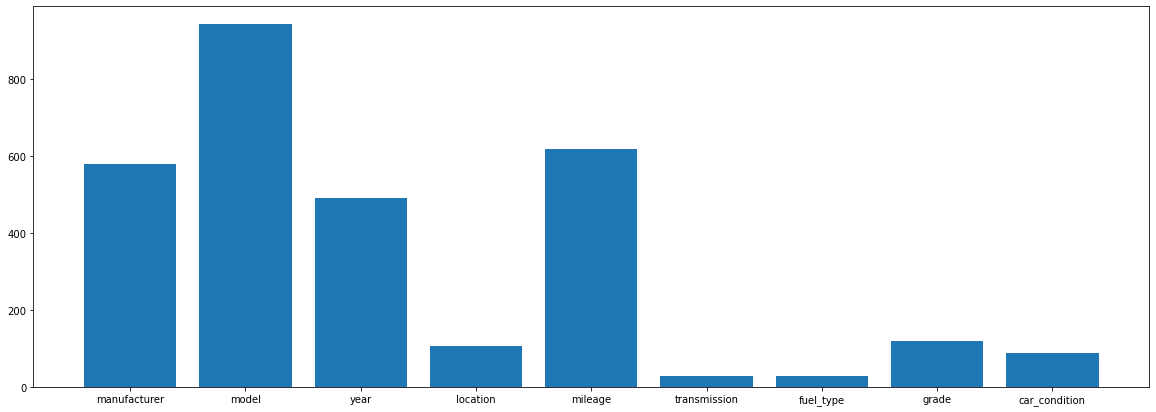

In [87]:
n_c = []
imp_c = []
for name, importance in zip(df_model.columns[:-1], lgbm.feature_importances_):
    print(name, "=", importance)
    n_c.append(name)
    imp_c.append(importance)

plt.figure(figsize=(20,7))  
plt.bar(n_c, imp_c)
plt.show()

From the observations of all the models that have been trained, the LGBM Regressor performed the best with R2 score of 0.729

From the feature importance plot, we can see that the fuel_type and transmission feature have the least effect/importance on the models price prediction so we would drop those features and retrain all the models

### Modelling With Feature Selection (Removed Fuel and Transmission Features)

In [90]:
df_nmodel = df[['manufacturer','model','year','location','mileage','grade','car_condition','price']]

In [91]:
df_nmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3146 entries, 0 to 3145
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   manufacturer   3146 non-null   int32
 1   model          3146 non-null   int32
 2   year           3146 non-null   int64
 3   location       3146 non-null   int32
 4   mileage        3146 non-null   int64
 5   grade          3146 non-null   int32
 6   car_condition  3146 non-null   int32
 7   price          3146 non-null   int64
dtypes: int32(5), int64(3)
memory usage: 135.3 KB


In [93]:
# selecting features, X
X = df_nmodel.iloc[:, :-1].values
# selecting labels, y
y = df_nmodel.iloc[:, -1].values

In [94]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (2516, 7) (2516,)
Test set:  (630, 7) (630,)


In [97]:
# define scaler
scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()
# fit scaler on the training dataset
scaler_std.fit(X_train)
# save the scaler
pickle.dump(scaler_std, open('./Scaler/standard_scaler_2.pkl', 'wb'))
# transform the training dataset
X_train_scaled = scaler_std.transform(X_train)
# transform the test dataset
X_test_scaled = scaler_std.transform(X_test)

In [98]:
def evaluate(model, test_features, test_labels, set_type):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    if set_type == 'train':
        print('Model Train Performance')
    else:
        print('Model Test Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))

#### Linear Regression

In [99]:
# to create the linear reg model
lin_reg = LinearRegression()
# fit the model to train set
lin_reg.fit(X_train_scaled, y_train)  

LinearRegression()

In [100]:
# to evaluate test set values
y_pred = lin_reg.predict(X_test_scaled)

In [101]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_pred), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_pred), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
print('R2 score: ', round(r2_score(y_test, y_pred), 3))

Mean Absolute Error:  912496.47
Mean Squared Error:  1485900031760.905
Root Mean Squared Error:  1218974.992
R2 score:  0.51


In [102]:
evaluate(lin_reg, X_train_scaled, y_train, 'train')
evaluate(lin_reg, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 57.88%.
Model Test Performance
Accuracy = 58.79%.


#### Polynomial Regression

In [103]:
# Polynomial transformation of degree 2
poly_features = PolynomialFeatures(degree = 2)
# Returns a transformed version of X with new features
poly_features.fit(X_train_scaled)
X_train_scaled_poly = poly_features.transform(X_train_scaled)
# save the scaler
pickle.dump(poly_features, open('poly_feature.pkl', 'wb'))
# transform test
X_test_scaled_poly = poly_features.transform(X_test_scaled)

In [104]:
poly_reg = LinearRegression()
poly_reg_score = cross_val_score(poly_reg, X_train_scaled_poly, y_train, verbose = 2)
poly_reg_score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


array([0.47110542, 0.51977778, 0.5653314 , 0.53999515, 0.52385089])

In [105]:
poly_reg.fit(X_train_scaled_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_scaled_poly)
poly_reg.score(X_test_scaled_poly, y_test)

0.5281805228077735

In [106]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_pred_poly), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_pred_poly), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)), 3))
print('R2 score: ', round(r2_score(y_test, y_pred_poly), 3))

Mean Absolute Error:  861082.832
Mean Squared Error:  1431893555006.311
Root Mean Squared Error:  1196617.548
R2 score:  0.528


#### Decision Trees

In [107]:
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree.fit(X_train_scaled, y_train.ravel())

DecisionTreeRegressor(random_state=42)

In [108]:
y_predDT = dec_tree.predict(X_test_scaled)

In [109]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predDT), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predDT), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predDT)), 3))
print('R2 score: ', round(r2_score(y_test, y_predDT), 3))

Mean Absolute Error:  812415.392
Mean Squared Error:  1501652014628.5
Root Mean Squared Error:  1225419.118
R2 score:  0.505


In [110]:
evaluate(dec_tree, X_train_scaled, y_train, 'train')
evaluate(dec_tree, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 99.97%.
Model Test Performance
Accuracy = 68.14%.


In [111]:
param_grid = {'max_features': ['auto', 'sqrt'],
              'max_depth': np.arange(5, 36, 5),
              'min_samples_split': [5, 10, 20, 40],
              'min_samples_leaf': [2, 6, 12, 24],
             }
tree_reg = RandomizedSearchCV(estimator = DecisionTreeRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)
tree_reg.fit(X_train_scaled, y_train)

# Results from Randomized Search
print("\n========================================================")
print(" Results from Randomized Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          tree_reg.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          tree_reg.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          tree_reg.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits

 Results from Randomized Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(max_depth=25, max_features='auto', min_samples_leaf=6,
                      min_samples_split=20)

 The best score across ALL searched params:
 0.5674836872695961

 The best parameters across ALL searched params:
 {'min_samples_split': 20, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 25}


In [112]:
new_dec_tree = DecisionTreeRegressor(min_samples_split=20, min_samples_leaf=6, max_features='auto', max_depth=25, random_state=42)
new_dec_tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=25, max_features='auto', min_samples_leaf=6,
                      min_samples_split=20, random_state=42)

In [113]:
y_predDT = new_dec_tree.predict(X_test_scaled)
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predDT), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predDT), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predDT)), 3))
print('R2 score: ', round(r2_score(y_test, y_predDT), 3))

Mean Absolute Error:  719120.181
Mean Squared Error:  1053490774506.392
Root Mean Squared Error:  1026396.987
R2 score:  0.653


In [114]:
evaluate(new_dec_tree, X_train_scaled, y_train, 'train')
evaluate(new_dec_tree, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 76.76%.
Model Test Performance
Accuracy = 69.85%.


#### Random Forest Regressor

In [115]:
rfr = RandomForestRegressor(random_state=42, n_estimators=800)
rfr.fit(X_train_scaled, y_train.ravel())

RandomForestRegressor(n_estimators=800, random_state=42)

In [116]:
y_predRF = rfr.predict(X_test_scaled)

In [117]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predRF), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predRF), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predRF)), 3))
print('R2 score: ', round(r2_score(y_test, y_predRF), 3))

Mean Absolute Error:  654988.204
Mean Squared Error:  887834725223.689
Root Mean Squared Error:  942249.821
R2 score:  0.707


In [118]:
evaluate(rfr, X_train_scaled, y_train, 'train')
evaluate(rfr, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 89.69%.
Model Test Performance
Accuracy = 72.91%.


In [119]:
# save the rf boost model
pickle.dump(rfr, open('random_forest_model.pkl', 'wb'))

In [120]:
# to find the best parameters for random forest

model = RandomForestRegressor()
n_estimators = [10, 50, 100, 250, 400, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]

parameters = {'n_estimators': n_estimators,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split,
              'max_features': max_features}

grid = GridSearchCV(model, parameters, cv = 2, n_jobs=-1)
gs = grid.fit(X_train_scaled, y_train)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          gs.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          gs.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          gs.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_features=None, n_estimators=50)

 The best score across ALL searched params:
 0.667426695837227

 The best parameters across ALL searched params:
 {'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [121]:
# using best parameters from grid search
rfr1 = RandomForestRegressor(random_state=42, n_estimators=900, min_samples_split=2)
rfr1.fit(X_train_scaled, y_train.ravel())

RandomForestRegressor(n_estimators=900, random_state=42)

In [122]:
y_predRF = rfr1.predict(X_test_scaled)

In [123]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predRF), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predRF), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predRF)), 3))
print('R2 score: ', round(r2_score(y_test, y_predRF), 3))

Mean Absolute Error:  656216.541
Mean Squared Error:  890128709981.951
Root Mean Squared Error:  943466.327
R2 score:  0.707


In [124]:
evaluate(rfr1, X_train_scaled, y_train, 'train')
evaluate(rfr1, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 89.68%.
Model Test Performance
Accuracy = 72.87%.


In [125]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 20, 40]
min_samples_leaf = [1, 2, 4, 6, 12, 24]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 2 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

# Results from Randomized Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          rf_random.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          rf_random.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          rf_random.best_params_)

Fitting 2 folds for each of 100 candidates, totalling 200 fits

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=60, n_estimators=1200)

 The best score across ALL searched params:
 0.6650910136145093

 The best parameters across ALL searched params:
 {'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': True}


In [126]:
# using best parameters from randomized search
rfr2 = RandomForestRegressor(random_state=42, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_depth=60)
rfr2.fit(X_train_scaled, y_train.ravel())

RandomForestRegressor(max_depth=60, n_estimators=1200, random_state=42)

In [127]:
y_predRF = rfr2.predict(X_test_scaled)

In [128]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predRF), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predRF), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predRF)), 3))
print('R2 score: ', round(r2_score(y_test, y_predRF), 3))

Mean Absolute Error:  655591.37
Mean Squared Error:  889594727472.58
Root Mean Squared Error:  943183.295
R2 score:  0.707


In [129]:
evaluate(rfr2, X_train_scaled, y_train, 'train')
evaluate(rfr2, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 89.68%.
Model Test Performance
Accuracy = 72.88%.


#### Extra Trees Regressor

In [130]:
et = ExtraTreesRegressor(n_estimators=800, random_state=42)
et.fit(X_train_scaled, y_train.ravel())

ExtraTreesRegressor(n_estimators=800, random_state=42)

In [131]:
y_predET = et.predict(X_test_scaled)

In [132]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predET), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predET), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predET)), 3))
print('R2 score: ', round(r2_score(y_test, y_predET), 3))

Mean Absolute Error:  741258.565
Mean Squared Error:  1149789575935.2
Root Mean Squared Error:  1072282.414
R2 score:  0.621


In [133]:
evaluate(et, X_train_scaled, y_train, 'train')
evaluate(et, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 99.96%.
Model Test Performance
Accuracy = 68.82%.


#### ADA BOOST REGRESSOR

In [134]:
ada = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=800, learning_rate=1.5, random_state=42)
ada.fit(X_train_scaled, y_train.ravel())

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=1.5,
                  n_estimators=800, random_state=42)

In [135]:
y_predADA = ada.predict(X_test_scaled)

In [136]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predADA), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predADA), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predADA)), 3))
print('R2 score: ', round(r2_score(y_test, y_predADA), 3))

Mean Absolute Error:  653860.711
Mean Squared Error:  940508803312.257
Root Mean Squared Error:  969798.331
R2 score:  0.69


In [137]:
evaluate(ada, X_train_scaled, y_train, 'train')
evaluate(ada, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 94.07%.
Model Test Performance
Accuracy = 73.51%.


In [138]:
# save the rf boost model
pickle.dump(ada, open('adaboost_model.pkl', 'wb'))

#### XGBRegressor

In [139]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
xgb.fit(X_train_scaled, y_train.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [140]:
y_predXGB = xgb.predict(X_test_scaled)

In [141]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predXGB), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predXGB), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predXGB)), 3))
print('R2 score: ', round(r2_score(y_test, y_predXGB), 3))

Mean Absolute Error:  653651.222
Mean Squared Error:  870272660040.847
Root Mean Squared Error:  932884.055
R2 score:  0.713


In [142]:
evaluate(xgb, X_train_scaled, y_train, 'train')
evaluate(xgb, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 97.34%.
Model Test Performance
Accuracy = 73.58%.


In [143]:
pickle.dump(xgb, open('xgbregressor_model.pkl', 'wb'))

#### XGBFRegressor

In [144]:
xgbrf = XGBRFRegressor(n_estimators=100, random_state=42)
xgbrf.fit(X_train_scaled, y_train.ravel())

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=4, num_parallel_tree=100,
               objective='reg:squarederror', random_state=42, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [145]:
y_predXGBRF = xgbrf.predict(X_test_scaled)

In [146]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predXGBRF), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predXGBRF), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predXGBRF)), 3))
print('R2 score: ', round(r2_score(y_test, y_predXGBRF), 3))

Mean Absolute Error:  792288.987
Mean Squared Error:  1197458430178.462
Root Mean Squared Error:  1094284.438
R2 score:  0.605


In [147]:
evaluate(xgbrf, X_train_scaled, y_train, 'train')
evaluate(xgbrf, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 68.07%.
Model Test Performance
Accuracy = 65.86%.


#### LGBMRegressor

In [148]:
lgbm = LGBMRegressor(n_estimators=200, random_state=42)
lgbm.fit(X_train_scaled, y_train.ravel())

LGBMRegressor(n_estimators=200, random_state=42)

In [149]:
y_predLGBM = lgbm.predict(X_test_scaled)

In [150]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predLGBM), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predLGBM), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predLGBM)), 3))
print('R2 score: ', round(r2_score(y_test, y_predLGBM), 3))

Mean Absolute Error:  636800.048
Mean Squared Error:  860335536106.956
Root Mean Squared Error:  927542.741
R2 score:  0.717


In [151]:
evaluate(lgbm, X_train_scaled, y_train, 'train')
evaluate(lgbm, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 85.04%.
Model Test Performance
Accuracy = 74.57%.


In [152]:
# save the lgbm regressor model
pickle.dump(lgbm, open('lgbmregressor_model.pkl', 'wb'))

#### CATBOOST Regressor

In [153]:
# to find the best parameters for catboost
from sklearn.model_selection import GridSearchCV
model = CatBoostRegressor()
parameters = {'depth'         : [6,8,10,12,14,16,18,20],
              'learning_rate' : [0.01, 0.05, 0.1, 0.5, 1],
              'iterations'    : [30, 50, 100]
              }
grid = GridSearchCV(model, parameters, cv = 2, n_jobs=-1)
gs = grid.fit(X_train_scaled, y_train)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          gs.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          gs.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          gs.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.19153398 0.49550699 0.59939913 0.68908085 0.64707243 0.2787374
 0.57361816 0.64850206 0.69597236 0.64138615 0.41846242 0.64369653
 0.69006359 0.69178279 0.61458948 0.18736917 0.48925184 0.60048412
 0.66980684 0.62071326 0.2758165  0.57421041 0.64577826 0.66913204
 0.6095812  0.41951815 0.64355547 0.68387674 0.66486855 0.6077423
 0.18304988 0.49248027 0.58606339 0.63756993 0.54710036 0.26739018
 0.56328946 0.63099055 0.63783438 0.54849207 0.40749677 0.63270655
 0.66947824 0.63522309 0.54246058 0.17407872 0.46729744 0.57092069
 0.62421853 0.54656124 0.25733349 0.55309329 0.61486874 0.62496948
 0.54638543 0.39029928 0.61636449 0.64405827 0.62139779 0.54542497
 0.17094974 0.45631108 0.55665239 0.57141042 0.55288616 0.25323513
 0.53166097 0.59279077 0.57290466 0.55064496 0.37827446 0.59481345
 0.62334394 0.57234624 0.54992055 0.16455192 0.44463338

0:	learn: 1338194.3677608	total: 50.9ms	remaining: 2.49s
1:	learn: 1174942.8041928	total: 58.8ms	remaining: 1.41s
2:	learn: 1079650.1218823	total: 68.4ms	remaining: 1.07s
3:	learn: 1045891.4621794	total: 76.9ms	remaining: 885ms
4:	learn: 1025919.8211937	total: 84.7ms	remaining: 762ms
5:	learn: 979887.1343012	total: 99ms	remaining: 726ms
6:	learn: 963050.4435542	total: 110ms	remaining: 678ms
7:	learn: 939213.0156444	total: 118ms	remaining: 619ms
8:	learn: 902392.9723177	total: 128ms	remaining: 582ms
9:	learn: 895094.3488261	total: 135ms	remaining: 539ms
10:	learn: 884606.9715113	total: 145ms	remaining: 514ms
11:	learn: 866603.4990452	total: 153ms	remaining: 485ms
12:	learn: 855524.8314101	total: 161ms	remaining: 459ms
13:	learn: 847059.5781645	total: 170ms	remaining: 437ms
14:	learn: 839935.7759534	total: 177ms	remaining: 414ms
15:	learn: 824442.8889954	total: 190ms	remaining: 403ms
16:	learn: 814728.5797181	total: 201ms	remaining: 391ms
17:	learn: 810374.8667802	total: 206ms	remaining:

In [154]:
#using the best parameters gotten above
cat_reg = CatBoostRegressor(depth=6, iterations=300, learning_rate=0.2, random_state=42)
cat_reg.fit(X_train_scaled, y_train.ravel())

0:	learn: 1513625.3719565	total: 4.98ms	remaining: 1.49s
1:	learn: 1421465.8761435	total: 9.66ms	remaining: 1.44s
2:	learn: 1350806.2164364	total: 12.2ms	remaining: 1.21s
3:	learn: 1277491.7886851	total: 17.7ms	remaining: 1.31s
4:	learn: 1231972.8832912	total: 22.1ms	remaining: 1.3s
5:	learn: 1192886.7546181	total: 26.3ms	remaining: 1.29s
6:	learn: 1166495.2207601	total: 31.3ms	remaining: 1.31s
7:	learn: 1116639.1208686	total: 35.5ms	remaining: 1.29s
8:	learn: 1099737.7216675	total: 39.9ms	remaining: 1.29s
9:	learn: 1085259.0846763	total: 45.6ms	remaining: 1.32s
10:	learn: 1062706.2028074	total: 50.1ms	remaining: 1.32s
11:	learn: 1044460.2669624	total: 54.9ms	remaining: 1.32s
12:	learn: 1036361.7270697	total: 60.5ms	remaining: 1.33s
13:	learn: 999972.4415480	total: 65.6ms	remaining: 1.34s
14:	learn: 989519.5103327	total: 69.7ms	remaining: 1.32s
15:	learn: 983863.5542537	total: 73.1ms	remaining: 1.3s
16:	learn: 967319.3492751	total: 78.6ms	remaining: 1.31s
17:	learn: 959778.4251549	tota

166:	learn: 578834.7080058	total: 891ms	remaining: 709ms
167:	learn: 578063.4655338	total: 913ms	remaining: 718ms
168:	learn: 577004.3241274	total: 935ms	remaining: 725ms
169:	learn: 576318.3316122	total: 954ms	remaining: 730ms
170:	learn: 574850.3664242	total: 988ms	remaining: 745ms
171:	learn: 573065.1082147	total: 1s	remaining: 748ms
172:	learn: 572012.5961735	total: 1.02s	remaining: 753ms
173:	learn: 570857.9310017	total: 1.04s	remaining: 756ms
174:	learn: 570210.0571768	total: 1.08s	remaining: 770ms
175:	learn: 569156.2791945	total: 1.13s	remaining: 800ms
176:	learn: 568485.1402372	total: 1.15s	remaining: 801ms
177:	learn: 566335.1151907	total: 1.19s	remaining: 817ms
178:	learn: 565412.8215506	total: 1.21s	remaining: 820ms
179:	learn: 564397.7790406	total: 1.23s	remaining: 820ms
180:	learn: 562887.4091271	total: 1.25s	remaining: 824ms
181:	learn: 561800.2596610	total: 1.28s	remaining: 829ms
182:	learn: 560484.5143344	total: 1.3s	remaining: 832ms
183:	learn: 559382.7141686	total: 1

In [155]:
y_predCAT = cat_reg.predict(X_test_scaled)

In [156]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predCAT), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predCAT), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predCAT)), 3))
print('R2 score: ', round(r2_score(y_test, y_predCAT), 3))

Mean Absolute Error:  633063.377
Mean Squared Error:  882129764323.803
Root Mean Squared Error:  939217.634
R2 score:  0.709


In [157]:
evaluate(cat_reg, X_train_scaled, y_train, 'train')
evaluate(cat_reg, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 84.20%.
Model Test Performance
Accuracy = 74.13%.


In [158]:
pickle.dump(cat_reg, open('cat_boost_model.pkl', 'wb'))

manufacturer = 914
model = 1878
year = 1018
location = 262
mileage = 1612
grade = 177
car_condition = 139


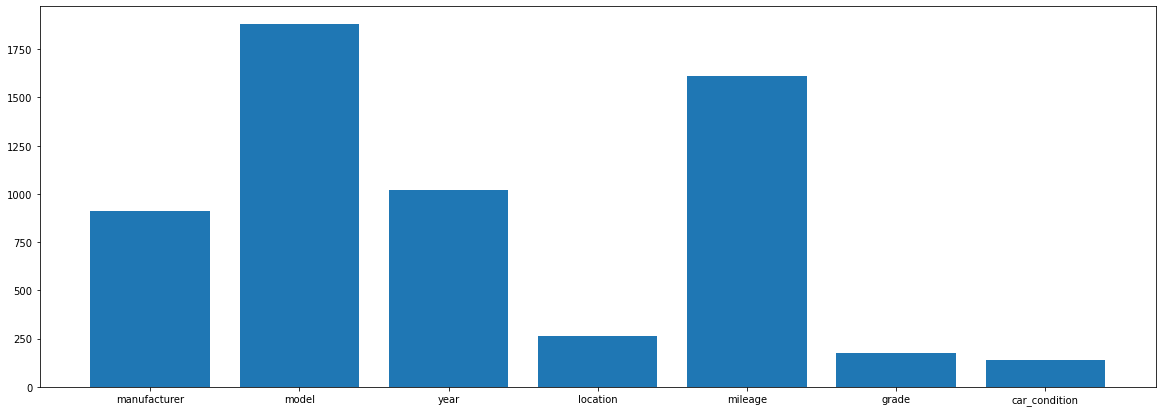

In [164]:
# feature importance plot
n_c = []
imp_c = []
for name, importance in zip(df_nmodel.columns[:-1], lgbm.feature_importances_):
    print(name, "=", importance)
    n_c.append(name)
    imp_c.append(importance)

plt.figure(figsize=(20,7))  
plt.bar(n_c, imp_c)
plt.show()

From the observations of all the models that have been trained using the reduced features, majority of the models performed better than when all the features were used.

In [204]:
# predicting a car price
man = 'TOYOTA'
mod = 'HIGHLANDER'
yr= 2002
loc = 'Lagos'
mileage = 175000
grade = 'C'
car_cond = 'NIGERIAN Used'


# manufacturer
if man != '' and man != ' ':
    man_enco = pickle.load(open('./Encoders/manufacturer_encoder.pk1', 'rb'))
    man_not_encoded =  np.array(man.lower()).ravel()
    man_encoded = man_enco.transform(man_not_encoded)[0]
else:
    man_encoded = np.nan
    
# model
if mod != '' and mod != ' ':
    mod_enco = pickle.load(open('./Encoders/model_encoder.pk1', 'rb'))
    mod_not_encoded =  np.array(mod.lower()).ravel()
    mod_encoded = mod_enco.transform(mod_not_encoded)[0]
else:
    mod_encoded = np.nan
    
# YEAR
if yr != '' and yr != ' ':
    yr = yr
else:
    yr = np.nan

# location
if loc != '' and loc != ' ':
    loc_enco = pickle.load(open('./Encoders/location_encoder.pk1', 'rb'))
    loc_not_encoded =  np.array(loc.lower()).ravel()
    loc_encoded = loc_enco.transform(loc_not_encoded)[0]
else:
    loc_encoded = np.nan

# mileage
if mileage != '' and mileage != ' ':
    mileage = mileage
else:
    mileage = np.nan

# grade
if grade != '' and grade != ' ':
    grade_enco = pickle.load(open('./Encoders/grade_encoder.pk1', 'rb'))
    grade_not_encoded =  np.array(grade.lower()).ravel()
    grade_encoded = grade_enco.transform(grade_not_encoded)[0]
else:
    grade_encoded = np.nan

# car_condition
if car_cond != '' and car_cond != ' ':
    car_condition_enco = pickle.load(open('./Encoders/car_condition_encoder.pk1', 'rb'))
    car_condition_not_encoded =  np.array(car_cond.lower()).ravel()
    car_condition_encoded = car_condition_enco.transform(car_condition_not_encoded)[0]
else:
    car_condition_encoded = np.nan

format to arrange car details
manufacturer,model,year,location,mileage,grade,car_condition

In [205]:
car = np.array([man_encoded,mod_encoded,yr,loc_encoded,mileage,grade_encoded,car_condition_encoded])
car = np.array([car])

In [206]:
car

array([[    47,    183,   2002,      7, 175000,      2,      1]])

In [207]:
# load the scaler
std_sc = pickle.load(open('./Scaler/standard_scaler_2.pkl', 'rb'))
# transform the car 
car_scaled = std_sc.transform(car)
car_scaled

array([[ 1.12335823,  0.13028719, -1.2356323 ,  0.50543792,  0.42683535,
        -1.0301442 ,  0.59020225]])

#### LGBM Prediction

In [200]:
# load the model(LGBM)
model_lgbm = pickle.load(open('lgbmregressor_model.pkl', 'rb'))

In [208]:
car_predict = model_lgbm.predict(car_scaled)
car_predict = round(car_predict[0])
print(f'The price of the car is {car_predict:,} naira')

The price of the car is 1,927,923 naira


#### CATBOOST Prediction

In [192]:
# load the model(CATBOOST)
model_CAT = pickle.load(open('cat_boost_model.pkl', 'rb'))

In [209]:
car_predict = model_CAT.predict(car_scaled)
car_predict = round(car_predict[0])
print(f'The price of the car is {car_predict:,} naira')

The price of the car is 1,948,842 naira


#### RandomForest Prediction

In [194]:
# load the model(RandomForest)
model_randomf = pickle.load(open('random_forest_model.pkl', 'rb'))

In [210]:
car_predict = model_randomf.predict(car_scaled)
car_predict = round(car_predict[0])
print(f'The price of the car is {car_predict:,} naira')

The price of the car is 1,709,741 naira
